In [ ]:
scenario_folder = 'scenario4/'

In [3]:
%matplotlib inline

In [4]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
def getRxPacketFile(eNBArray, UEArray, basefolder = ''):
    """ Gets the RxPacketTrace file with
    len(eNBArray) eNBs (radio base station) containers and with
    len(UEArray) UE (user equipment) containers.
    The filename will be for example:
    'RxPacketTrace_e1_e2_e3_u1_u2.txt'
    where e1, e2 and e3 are three eNB containers (representing
    a number of antenas for container), u1 and u2 will be
    user equipment containers, (representing for example 2 rooms
    each with u1 and u2 user equipments respectively)."""
    eNBString = ''
    UEString = ''
    if (len(eNBArray) > 0) and (len(UEArray) > 0):
        for numENB in eNBArray:
            eNBString = eNBString + '_' + str(numENB)
        for numUE in UEArray:
            UEString = UEString + '_' + str(numUE)
    
    
    filename = basefolder + 'RxPacketTrace' + eNBString + UEString + '.txt'
    if os.path.isfile(filename):
#        rxpacketfile = open(filename, "r")
#        return csv.DictReader(rxpacketfile, delimiter='\t')
        with open(filename, "r") as rxpacketfile:
            return pd.read_csv(rxpacketfile, sep='\t', \
                               names=['mode', 'time', 'frame', 'subF', '1stSym', \
                                   'symbol#', 'cellId', 'rnti', 'ccId', 'tbSize', 'mcs', 'rv', \
                                   'SINR(dB)', 'corrupt', 'TBler'], \
                               dtype={'mode': str}, \
                               index_col=1,
                               low_memory=False,
                               #skiprows=0,
                               #header=0,
                               verbose=True,
                               
                              )
    else:
        return None
    

        

In [7]:
def getTcpWindowFile(basefolder = ''):
    """ Gets the mmWave-tcp-window-newreno.txt.
    This file contains the following structure:
    TIMESTAMP \t OLD_CWND \t NEW_CWND
    
    where CWND is the tcp congestion window size.
    
    The file doesn't contain a header and is tab separeted
    
    """
    filename = basefolder + 'mmWave-tcp-window-newreno.txt'
    if os.path.isfile(filename):
#        rxpacketfile = open(filename, "r")
#        return csv.DictReader(rxpacketfile, delimiter='\t')
        with open(filename, "r") as file:
            return pd.read_csv(file, sep='\t', \
                               names=['time', 'old_CWND', 'new_CWND'],
                               index_col=0,
                               low_memory=False,
                               #skiprows=0,
                               #header=0,
                               verbose=True,
                              )
    else:
        return None
    

        

In [8]:
def getTcpRTTFile(basefolder = ''):
    """ Gets the mmWave-tcp-rtt-newreno.txt.
    This file contains the following structure:
    TIMESTAMP \t OLD_RTT \t NEW_RTT
    
    where RTT is the round-time-trip.
    
    The file doesn't contain a header and is tab separeted
    
    """
    filename = basefolder + 'mmWave-tcp-rtt-newreno.txt'
    if os.path.isfile(filename):
        with open(filename, "r") as file:
            return pd.read_csv(file, sep='\t', \
                               names=['time', 'old_RTT', 'new_RTT'],
                               index_col=0,
                               low_memory=False,
                               #skiprows=0,
                               #header=0,
                               verbose=True,
                              )
    else:
        return None
    

        

In [9]:
def getTcpDataFile(basefolder = ''):
    """ Gets the mmWave-tcp-rtt-newreno.txt.
    This file contains the following structure:
    TIMESTAMP \t PKG_SIZE
    
    where PKG_SIZE is the size of the received package
    
    The file doesn't contain a header and is tab separeted.
    
    """
    filename = basefolder + 'mmWave-tcp-data-newreno.txt'
    if os.path.isfile(filename):
        with open(filename, "r") as file:
            return pd.read_csv(file, sep='\t', \
                               names=['time', 'PKG_SIZE'],
                               index_col=0,
                               low_memory=False,
                               #skiprows=0,
                               #header=0,
                               verbose=True,
                              )
    else:
        return None
    

        

In [10]:
os.listdir()

['paulista_back_tcp',
 'Scenario9.ipynb',
 'paulista_double_tcp',
 '.ipynb_checkpoints',
 'Scenario8.ipynb',
 'paulista_tcp',
 'test_10sec_antipodal_shadow_off',
 'Scenario10.ipynb',
 'Scenario7.ipynb',
 'Scenario4.ipynb',
 '.gitignore',
 'Scenario11.ipynb',
 '.gitattributes',
 'test_10sec_5_10_15_shadow_off',
 'Scenario3.ipynb']

In [11]:
eNBs = []
UEs = []

rxDF_scenario = getRxPacketFile(eNBs,UEs, scenario_folder)
cwndDF_scenario = getTcpWindowFile(scenario_folder)
rttDF_scenario = getTcpRTTFile(scenario_folder)
dataDF_scenario = getTcpDataFile(scenario_folder)

Tokenization took: 192.72 ms
Type conversion took: 399.32 ms
Parser memory cleanup took: 7.37 ms
Tokenization took: 246.45 ms
Type conversion took: 148.20 ms
Parser memory cleanup took: 6.06 ms


/home/arturao/miniconda3/envs/tf36/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Tokenization took: 291.35 ms
Type conversion took: 158.81 ms
Parser memory cleanup took: 5.31 ms
Tokenization took: 301.06 ms
Type conversion took: 147.49 ms
Parser memory cleanup took: 6.78 ms


In [12]:
if rxDF_scenario is None:
    print('RxPacket file not found!')
else:
    rxDF_scenario = rxDF_scenario[1:].copy() #First line (headers) is skipped
    print(f'RxPacket file loaded as dataframe (eNBs: {eNBs}), (UEs: {UEs})')
    rxDF_scenario.index = rxDF_scenario.index.astype('float')
    rxDF_scenario['SINR(dB)']   = pd.DataFrame(rxDF_scenario['SINR(dB)'], dtype='float')
    rxDF_scenario['rnti']       = pd.DataFrame(rxDF_scenario['rnti'], dtype='int')
    rxDF_scenario['cellId']     = pd.DataFrame(rxDF_scenario['cellId'], dtype='int')
    rxDF_scenario['TBler']      = pd.DataFrame(rxDF_scenario['TBler'], dtype='float')

RxPacket file loaded as dataframe (eNBs: []), (UEs: [])


In [13]:
rxDF_scenario.tail()

,mode,frame,subF,1stSym,symbol#,cellId,rnti,ccId,tbSize,mcs,rv,SINR(dB),corrupt,TBler
time,,,,,,,,,,,,,,
24.9998,UL,24999,7,16,1,1,1,0,1776,28,0,36.1558,0,6.661340e-16
24.9998,DL,24999,8,1,8,1,1,0,14247,28,0,36.1558,,0.000000e+00
24.9998,UL,24999,8,9,1,1,1,0,1776,28,0,36.1558,0,6.661340e-16
24.9999,DL,24999,9,1,8,1,1,0,14247,28,0,36.1558,,0.000000e+00
24.9999,UL,24999,9,9,1,1,1,0,1776,28,0,36.1558,0,6.661340e-16


In [14]:
rxDF_scenario.index

Float64Index([0.00310832, 0.00360832, 0.00400832,  0.0331125,  0.0336083,
               0.0340083,   0.111312,   0.111812,   0.112208,   0.134296,
              ...
                 24.9995,    24.9995,    24.9996,    24.9996,    24.9998,
                 24.9998,    24.9998,    24.9998,    24.9999,    24.9999],
             dtype='float64', name='time', length=398199)

In [15]:
cwndDF_scenario.head()

,old_CWND,new_CWND
time,,
0.122913,0,1400
0.145913,1400,2800
0.168908,2800,4200
0.191908,4200,5600
0.214913,5600,7000


In [16]:
rttDF_scenario.head()

,old_RTT,new_RTT
time,,
0.122913,0.000000,0.022000
0.145913,0.022000,0.022125
0.168908,0.022125,0.022234
0.191908,0.022234,0.022330
0.214913,0.022330,0.025289


In [17]:
dataDF_scenario.head()

,PKG_SIZE
time,
0.134437,1400
0.157496,1400
0.157562,1400
0.180496,1400
0.180596,1400


In [18]:
mergedIndexes = np.concatenate((rxDF_scenario.index,cwndDF_scenario.index, rttDF_scenario.index, dataDF_scenario.index))
mergedIndexes.sort(kind='merge')
mergedIndexes = np.unique(mergedIndexes)
print(mergedIndexes)

[3.10832e-03 3.60832e-03 4.00832e-03 ... 2.49996e+01 2.49998e+01
 2.49999e+01]


In [19]:
from collections import defaultdict
d = defaultdict(LabelEncoder)

In [20]:
integerIndexes = d['time'].fit_transform(mergedIndexes)

In [21]:
integerIndexes

array([     0,      1,      2, ..., 297326, 297327, 297328])

In [22]:
rxDF_scenario = rxDF_scenario.set_index(d['time'].transform(rxDF_scenario.index));
cwndDF_scenario = cwndDF_scenario.set_index(d['time'].transform(cwndDF_scenario.index));
rttDF_scenario = rttDF_scenario.set_index(d['time'].transform(rttDF_scenario.index));
dataDF_scenario = dataDF_scenario.set_index(d['time'].transform(dataDF_scenario.index));

In [23]:
np.unique(rxDF_scenario['cellId'])

array([1])

In [24]:
print(f"unique rnti\'s: {np.unique(rxDF_scenario['rnti'])}")
print(f"\n\nNumber of unique rnti's: {len(np.unique(rxDF_scenario['rnti']))}")

print("\n\n RNTI 1:")
print(rxDF_scenario[rxDF_scenario['rnti'] == 1])

unique rnti's: [1]


Number of unique rnti's: 1


 RNTI 1:
       mode  frame subF 1stSym symbol#  cellId  rnti ccId tbSize mcs rv  \
0        DL      3    1      1       1       1     1    0     48   0  0   
1        UL      3    6      1       1       1     1    0     48   0  0   
2        DL      4    0      1       1       1     1    0   1776  28  0   
3        DL     33    1      1       2       1     1    0    100   0  0   
4        UL     33    6      1       1       1     1    0     48   0  0   
5        DL     34    0      1       1       1     1    0   1776  28  0   
6        DL    111    3      1       2       1     1    0    100   0  0   
7        UL    111    8      1       2       1     1    0    100   0  0   
8        DL    112    2      1       1       1     1    0   1776  28  0   
10       DL    134    2      1      22       1     1    0   1131   0  0   
11       DL    134    3      1       8       1     1    0    411   0  0   
13       UL    134    7      1       1   

In [25]:
cellIdGroupedRBs = rxDF_scenario.groupby(['cellId'])
rntiCellIdGrouped = rxDF_scenario.groupby(['cellId', 'rnti'])
rntiGrouped = rxDF_scenario.groupby(['rnti'])
rntiModeGrouped = rxDF_scenario.groupby(['mode', 'rnti'])

In [26]:
print(len(cellIdGroupedRBs.groups))
print(len(rntiCellIdGrouped.groups))
print(len(rntiGrouped.groups))
print(len(rntiModeGrouped.groups))

1
1
1
2


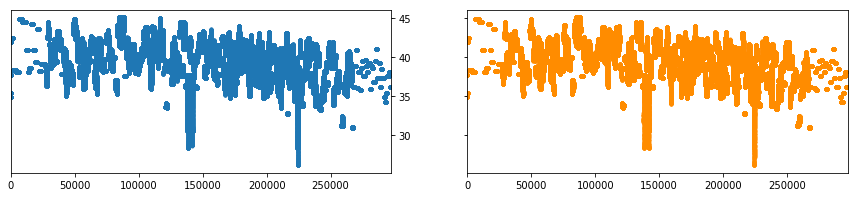

In [34]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,3))

ax.yaxis.tick_right()

rntiModeGrouped.get_group(('DL', 1))['SINR(dB)'].plot(style='.', ax=ax)
rntiModeGrouped.get_group(('UL', 1))['SINR(dB)'].plot(style='.', color='darkorange', ax=ax2)

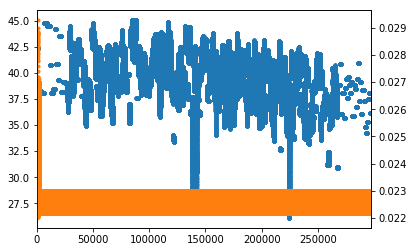

In [32]:
#for grp in rntiGrouped.groups:
ax = rntiGrouped.get_group(1)['SINR(dB)'].plot(style='.')
rttDF_scenario['new_RTT'].plot(secondary_y=True, style='.')

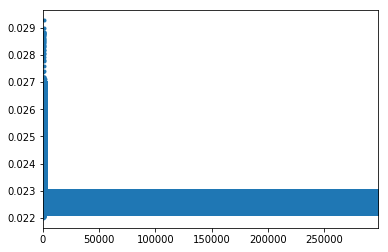

In [29]:
#for grp in rntiGrouped.groups:
rttDF_scenario['new_RTT'].plot(style='.')

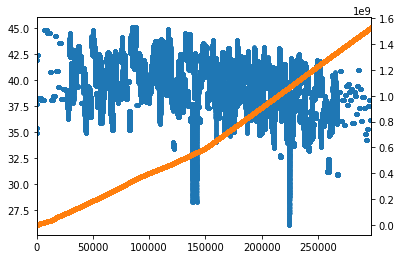

In [30]:
ax = rntiGrouped.get_group(1)['SINR(dB)'].plot(style='.')
cwndDF_scenario['new_CWND'].plot(secondary_y=True, style='.')

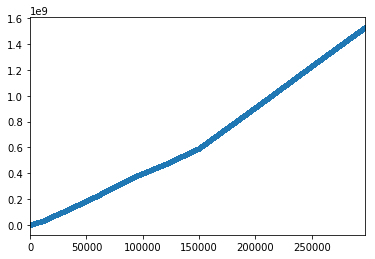

In [31]:
cwndDF_scenario['new_CWND'].plot(style='.')

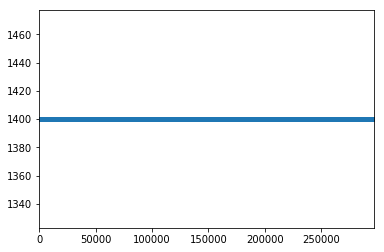

In [56]:
dataDF_scenario['PKG_SIZE'].plot(style='.')